In [1]:
import sys
from pyprojroot import here
sys.path.insert(0, str(here()))

In [30]:
import sympy as sp
import numpy as np
import pennylane as qml
from sympy import symbols, Matrix
import matplotlib.pyplot as plt
from sympy.physics.quantum import TensorProduct

In [3]:
from Entanglement.ExpandedStatesSet.WernerESSQNN import YdY
from Utils import bellState
from Entanglement.ExpandedStatesSet.ESSUtils import gen_abs_uniform

In [34]:
#* constants
phi_plus = Matrix(bellState("phi_plus"))
phi_minus = Matrix(bellState("phi_minus"))

#* matrix form
a, b = symbols('a b')
dm_convex = (1-a-b) * sp.eye(4)/4 + a * phi_minus * phi_minus.H + b * phi_plus * phi_plus.H

swap & swapp as ob case, two RY gates each

In [58]:
def roundCoeffsOfSpExpr(LineExpr):
    """Return the coeffs rounder expression"""
    coeffs = LineExpr.as_coefficients_dict()
    map = {symbol: round(coeff, 2) for symbol, coeff in coeffs.items()}
    return sum([symbol * coeff for symbol, coeff in map.items()])

tmp_O = np.random.random((4,4))
roundCoeffsOfSpExpr(np.trace(tmp_O @ dm_convex))

-0.47*a + 0.39*b + 0.79

In [19]:
def zero_state(num_qbits):
    """Return the zero state of given number of qubits"""
    return np.array([1] + [0]*(2**num_qbits-1))

def dmx_zero(num_qbits):
    """Return dmx corresponds to the zero state"""
    return np.outer(zero_state(num_qbits), zero_state(num_qbits))

In [61]:
def plotGeneratedLines(dmx_sp, ansatz1, ansatz2, params1, params2, num_samples_line):

    qnn1 = qml.matrix(ansatz1)(params1)
    qnn2 = qml.matrix(ansatz2)(params2)

    if qnn1.shape == (16, 16):
        rho_zero = dmx_zero(2)
        dmx_sp = TensorProduct(dmx_sp, Matrix(rho_zero))

    # trace output
    tr1 = sp.trace(qnn1 * dmx_sp)
    tr2 = sp.trace(qnn2 * dmx_sp)

    # data load and plot generated lines
    y1 = sp.solve(tr1, b)
    y1 = y1[0]
    y2 = sp.solve(tr2, b)
    y2 = y2[0]

    pairs = gen_abs_uniform(num_samples_line)

    def plotOriginal(ax):
        x = np.linspace(0, 1, 50)
        #* target two lines
        y = 1/3*x + 1/3
        ax.plot(x, y, color="r", label=f"$b = 1/3*a + 1/3$")
        y = 3*x - 1
        ax.plot(x, y, color="r", label=f"$b = 3*a - 1$")
        #* learned two lines
        y = [y1.subs(a, xi) for xi in x]
        ax.plot(x, y, color="b", label=f'$b_1={roundCoeffsOfSpExpr(y1)}$')
        y = [y2.subs(a, xi) for xi in x]
        ax.plot(x, y, color="g", label=f'$b_2={roundCoeffsOfSpExpr(y2)}$')
        #* samples
        x, y = zip(*pairs)
        ax.scatter(x, y)
        # annotation
        # for i, (xi, yi) in enumerate(pairs):
            # plt.annotate(str(i), (xi, yi))

    fig, ax = plt.subplots(1,2, figsize=(12, 5))

    plotOriginal(ax[0])
    plotOriginal(ax[1])
    ax[1].set_ylim([-0.1, 1.1])
    ax[1].legend(loc="upper right")

    return fig, ax

YdY check

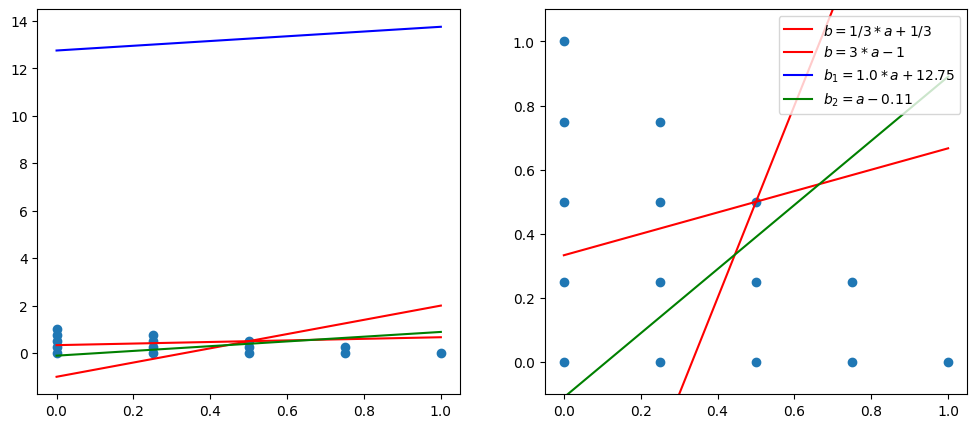

In [62]:
# load QNN
params = [[0.45966755, 6.9300511],[3.78962861, 2.50919743]]

fig, ax = plotGeneratedLines(dm_convex, YdY, YdY, params[0], params[1], 5)
    
plt.show()

cced U complexed rs check

TypeError: can't convert complex to float

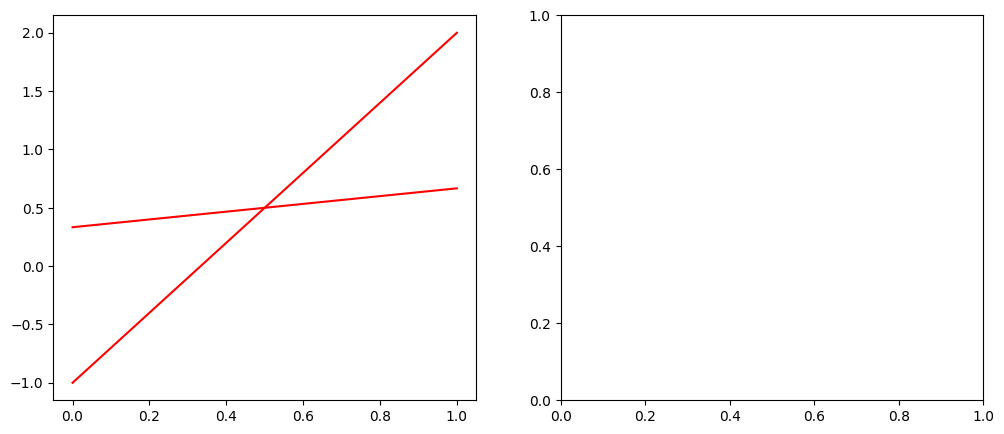

In [63]:
from Entanglement.ExpandedStatesSet.WernerESSQNN import ansatz_p2_ps_c2
# load QNN
ansatz = ansatz_p2_ps_c2
params = np.load("./TmpRecord/ESS_ps_0711p.npy")
# paramsG = np.load("./TmpRecord/ESS_ps_0711pG.npy")

fig, ax = plotGeneratedLines(dm_convex, ansatz, ansatz, params[0], params[1], 5)

plt.show()